# <font color = "blue"> Exploração dos Titanic do Naufrágio</font>

# Resumo

   O Titanic, um dos maiores e mais luxuosos navios de passageiros de sua época, naufragou tragicamente em sua 
viagem inaugural de Southampton para Nova York em 15 de abril de 1912. O naufrágio ocorreu após colidir com um 
iceberg no Oceano Atlântico Norte, resultando em uma das maiores tragédias marítimas da história. 

Perguntas para Explorar com Dados do Kaggle:

    1-)Qual foi a taxa de sobrevivência geral dos passageiros a bordo do Titanic?
    2-)Existe uma diferença significativa na taxa de sobrevivência entre passageiros do sexo masculino e feminino?
    3-)Qual foi a relação entre a classe socioeconômica dos passageiros e sua taxa de sobrevivência?
    4-)Houve alguma correlação entre a idade dos passageiros e suas chances de sobrevivência?
    5-)Os passageiros que viajavam sozinhos tinham uma taxa de sobrevivência diferente daqueles que viajavam com familiares?

# Bibliotecas

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

# DataFrames 

In [4]:
df_train = pd.read_csv("C:/FCD/I2A2/Titanic/train.csv") 

# Analisando os Dados

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dicionário do dataset

In [6]:
dicionario = pd.read_excel('C:/FCD/I2A2/Titanic/dictionary_titanic.xlsx')

In [7]:
dicionario

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


# Perguntas para Explorar com Dados

1-) Qual foi a taxa de sobrevivência geral dos passageiros a bordo do Titanic?

In [8]:
contagem = df_train['Survived'].value_counts()

In [9]:
contagem.index = contagem.index.map({0: 'morto', 1: 'Vivo'})

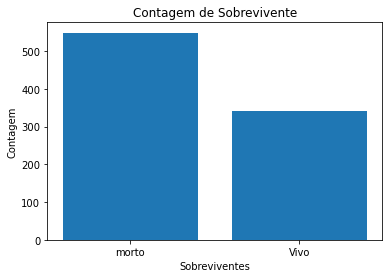

In [10]:
plt.bar(contagem.index,contagem.values)
plt.xlabel('Sobreviventes')
plt.ylabel('Contagem')
plt.title('Contagem de Sobrevivente')
plt.show()

In [11]:
print('Contagem de valores:')
print(contagem)

Contagem de valores:
morto    549
Vivo     342
Name: Survived, dtype: int64


In [12]:
# Calcular porcetagem
total_sobreviventes = contagem.sum()
porcentagem_sobreviventes = (contagem/total_sobreviventes) * 100

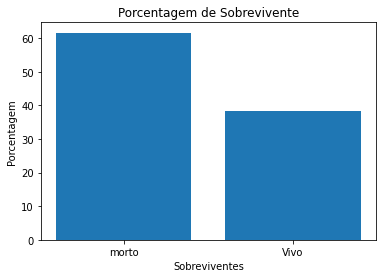

In [13]:
plt.bar(porcentagem_sobreviventes.index,porcentagem_sobreviventes.values)
plt.xlabel('Sobreviventes')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Sobrevivente')
plt.show()

In [14]:
for categoria, porcentagem in porcentagem_sobreviventes.items():
    print(f"{categoria}: {porcentagem:.2f}%")

morto: 61.62%
Vivo: 38.38%


2-)Existe uma diferença significativa na taxa de sobrevivência entre passageiros do sexo masculino e feminino?

In [15]:
contagem_sexo = df_train['Sex'].value_counts()

In [16]:
contagem_sexo

male      577
female    314
Name: Sex, dtype: int64

In [17]:
contagem_sexo.index = contagem_sexo.index.map({'male': 'masculino', 'female': 'feminino'})

In [19]:
# Calculando porcetagem
total_genero = contagem_sexo.sum()
genero_porcentagem = (contagem_sexo/total_genero)*100

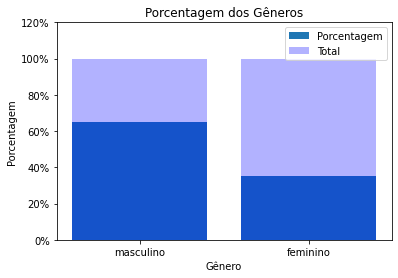

In [20]:
# Criando o gráfico de barras para porcentagens
plt.bar(genero_porcentagem.index, genero_porcentagem.values, label='Porcentagem')

# Adicionando rótulos e título
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')
plt.title('Porcentagem dos Gêneros')

# Adicionando barras secundárias para representar o total
total_por_genero = genero_porcentagem.sum()
plt.bar(genero_porcentagem.index, [total_por_genero] * len(genero_porcentagem), alpha=0.3, color='blue', label='Total')

# Adicionando legenda
plt.legend()

# Definindo o formato das porcentagens no eixo y
plt.yticks(plt.gca().get_yticks(), ['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

# Exibindo o gráfico
plt.show()


In [21]:
print('Contagem gênero:')
print(contagem_sexo)

Contagem gênero:
masculino    577
feminino     314
Name: Sex, dtype: int64


In [22]:
for categoria, porcentagem in genero_porcentagem.items():
    print (f"{categoria}: {porcentagem: .2f}%")

masculino:  64.76%
feminino:  35.24%


3-)Qual foi a relação entre a classe socioeconômica dos passageiros e sua taxa de sobrevivência?

In [23]:
df_train_group = df_train.groupby('Pclass')

In [24]:
# Número de grupos
len(df_train_group)

3

In [25]:
ordena_classe = df_train_group.size()

In [26]:
# Ordena os grupos por ordem decrescente
ordena_classe.sort_values(ascending= False)

Pclass
3    491
1    216
2    184
dtype: int64

In [27]:
ordena_classe.index = ordena_classe.index.map({ 1 : "1st", 2:"2nd", 3: "3rd"})

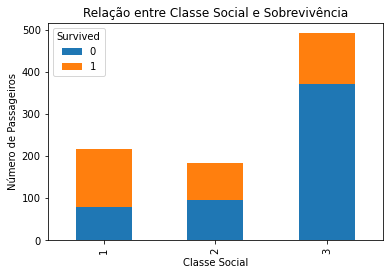

In [28]:
df_train.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True)

# Adicionando rótulos e título
plt.xlabel('Classe Social')
plt.ylabel('Número de Passageiros')
plt.title('Relação entre Classe Social e Sobrevivência')

# Exibindo o gráfico
plt.show()

In [29]:
correlacao = df_train['Pclass'].corr(df_train['Survived'])
print(f"Correlação entre 'Classe social' e 'Sobrevivente': {correlacao}")

Correlação entre 'Classe social' e 'Sobrevivente': -0.3384810359610147


A correlação é um valor entre -1 e 1, onde:

    Um valor próximo de 1 indica uma forte correlação positiva.
    Um valor próximo de -1 indica uma forte correlação negativa.
    Um valor próximo de 0 indica que não há correlação.

4-)Houve alguma correlação entre a idade dos passageiros e suas chances de sobrevivência?

In [30]:
correlacao_idade_sobrevivente = df_train['Age'].corr(df_train['Survived'])
print(f'Correlação entre Idade e Sobrevivente: {correlacao_idade_sobrevivente}')

Correlação entre Idade e Sobrevivente: -0.07722109457217764


A correlação é um valor entre -1 e 1, onde:

        Um valor próximo de 1 indica uma forte correlação positiva.
        Um valor próximo de -1 indica uma forte correlação negativa.
        Um valor próximo de 0 indica que não há correlação.

5-)Os passageiros que viajavam sozinhos tinham uma taxa de sobrevivência diferente daqueles que viajavam com familiares?

In [31]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:


# 1. Identificar quem viajava sozinho e quem viajava com familiares
df_train['Viajava_Sozinho'] = (df_train['SibSp'] == 0) & (df_train['Parch'] == 0)

# 2. Calcular a taxa de sobrevivência para ambos os grupos
taxa_sobrevivencia_sozinho = df_train[df_train['Viajava_Sozinho']]['Survived'].mean()
taxa_sobrevivencia_com_familiares = df_train[~df_train['Viajava_Sozinho']]['Survived'].mean()

# 3. Comparar as taxas de sobrevivência
if taxa_sobrevivencia_sozinho > taxa_sobrevivencia_com_familiares:
    print("Os passageiros que viajavam sozinhos tinham uma taxa de sobrevivência maior.")
elif taxa_sobrevivencia_sozinho < taxa_sobrevivencia_com_familiares:
    print("Os passageiros que viajavam com familiares tinham uma taxa de sobrevivência maior.")
else:
    print("Não houve diferença significativa na taxa de sobrevivência entre os passageiros que viajavam sozinhos e os que viajavam com familiares.")


Os passageiros que viajavam com familiares tinham uma taxa de sobrevivência maior.


In [33]:
# 2. Calcular a taxa de sobrevivência para ambos os grupos
taxa_sobrevivencia_sozinho = df_train[df_train['Viajava_Sozinho']]['Survived'].mean() * 100
taxa_sobrevivencia_com_familiares = df_train[~df_train['Viajava_Sozinho']]['Survived'].mean() * 100

# Exibir as taxas de sobrevivência em porcentagem
print("Taxa de sobrevivência para passageiros que viajavam sozinhos: {:.2f}%".format(taxa_sobrevivencia_sozinho))
print("Taxa de sobrevivência para passageiros que viajavam com familiares: {:.2f}%".format(taxa_sobrevivencia_com_familiares))


Taxa de sobrevivência para passageiros que viajavam sozinhos: 30.35%
Taxa de sobrevivência para passageiros que viajavam com familiares: 50.56%


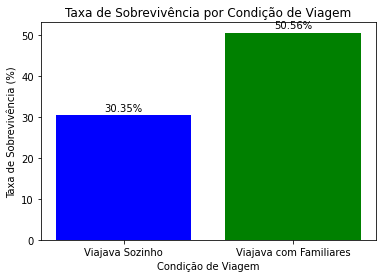

In [34]:

# Dados das taxas de sobrevivência
categorias = ['Viajava Sozinho', 'Viajava com Familiares']
taxas_sobrevivencia = [taxa_sobrevivencia_sozinho, taxa_sobrevivencia_com_familiares]

# Criar o gráfico de barras
plt.bar(categorias, taxas_sobrevivencia, color=['blue', 'green'])

# Adicionar rótulos e título
plt.xlabel('Condição de Viagem')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.title('Taxa de Sobrevivência por Condição de Viagem')

# Exibir as taxas de sobrevivência acima das barras
for i in range(len(categorias)):
    plt.text(i, taxas_sobrevivencia[i] + 1, f'{taxas_sobrevivencia[i]:.2f}%', ha='center')

# Exibir o gráfico
plt.show()
